In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [109]:
data = pd.read_csv('/content/train_LZdllcl.csv')

In [110]:
data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [111]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [112]:
data.shape

(54808, 14)

# **Missing value handling**

In [113]:
data.isna().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [114]:
#education

In [115]:
data['education'].unique()
data['education'].mode(0)
data['education'] = data['education'].fillna(data['education'].mode()[0])


In [116]:
#previous_year_rating

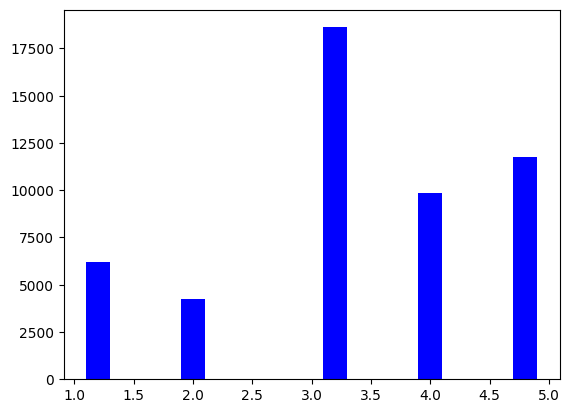

In [117]:
plt.hist(data['previous_year_rating'],rwidth=0.5,color="blue")
plt.show()

In [118]:
data['previous_year_rating'] = data['previous_year_rating'].fillna(data['previous_year_rating'].median())

In [119]:
data.isna().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

# **Outlier detection**

In [120]:
data.dtypes

employee_id               int64
department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
is_promoted               int64
dtype: object

In [121]:
# no_of_trainings

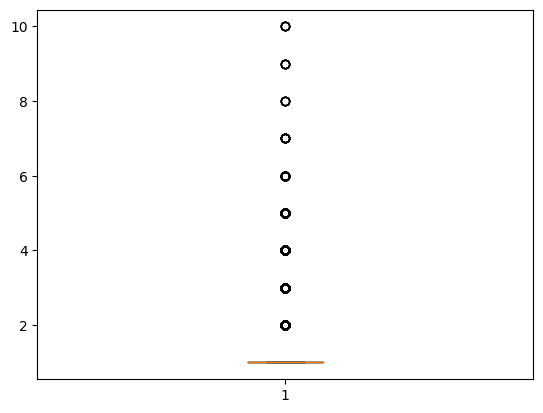

In [122]:

plt.boxplot(data['no_of_trainings'])
plt.show()

In [123]:
q1 = data['no_of_trainings'].quantile(0.25)
q2 = data['no_of_trainings'].quantile(0.5)
q3 = data['no_of_trainings'].quantile(0.75)

In [124]:
iqr = q3 -q1
up_lim = q3+(1.5*iqr)
low_lim = q1-(1.5*iqr)
print(up_lim,low_lim)

1.0 1.0


In [125]:
def limit_imputer(value):
    if value>up_lim:
        return up_lim
    if value<low_lim:
        return low_lim
    else:
        return value

In [126]:
data['no_of_trainings'] = data['no_of_trainings'].apply(limit_imputer)

In [127]:
# age

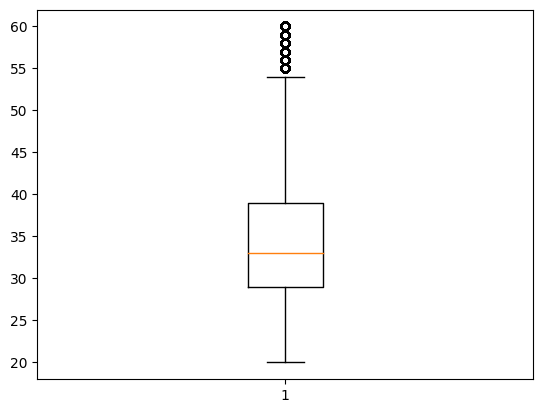

In [128]:
plt.boxplot(data['age'])
plt.show()

In [129]:
q1 = data['age'].quantile(0.25)
q2 = data['age'].quantile(0.5)
q3 = data['age'].quantile(0.75)

In [130]:
iqr = q3 -q1
up_lim = q3+(1.5*iqr)
low_lim = q1-(1.5*iqr)
print(up_lim,low_lim)

54.0 14.0


In [131]:
def limit_imputer(value):
    if value>up_lim:
        return up_lim
    if value<low_lim:
        return low_lim
    else:
        return value

In [132]:
data['age'] = data['age'].apply(limit_imputer)

In [133]:
# previous_year_rating

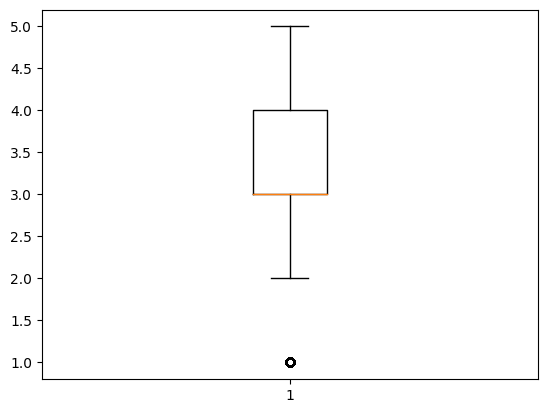

In [134]:
plt.boxplot(data['previous_year_rating'])
plt.show()

In [135]:
iqr = q3 -q1
up_lim = q3+(1.5*iqr)
low_lim = q1-(1.5*iqr)
print(up_lim,low_lim)

54.0 14.0


In [136]:
def limit_imputer(value):
    if value>up_lim:
        return up_lim
    if value<low_lim:
        return low_lim
    else:
        return value

In [137]:
data['previous_year_rating'] = data['previous_year_rating'].apply(limit_imputer)

In [138]:
# length_of_service

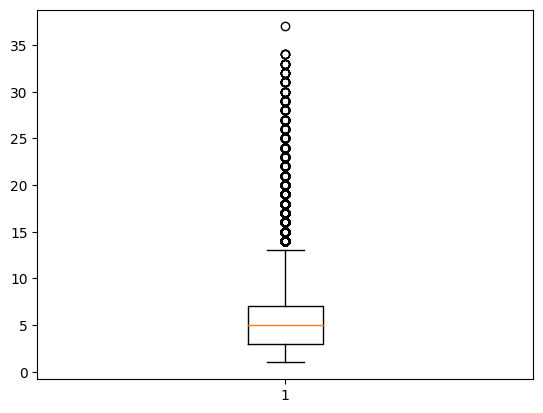

In [139]:
plt.boxplot(data['length_of_service'])
plt.show()

In [140]:
q1 = data['length_of_service'].quantile(0.25)
q2 = data['length_of_service'].quantile(0.5)
q3 = data['length_of_service'].quantile(0.75)

In [141]:
iqr = q3 -q1
up_lim = q3+(1.5*iqr)
low_lim = q1-(1.5*iqr)
print(up_lim,low_lim)

13.0 -3.0


In [142]:
def limit_imputer(value):
    if value>up_lim:
        return up_lim
    if value<low_lim:
        return low_lim
    else:
        return value

In [143]:
data['length_of_service'] = data['length_of_service'].apply(limit_imputer)

In [144]:
# KPIs_met >80%

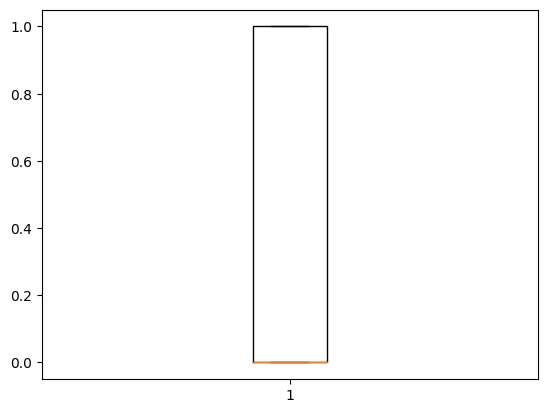

In [145]:
plt.boxplot(data['KPIs_met >80%'])
plt.show()

In [146]:
# awards_won?

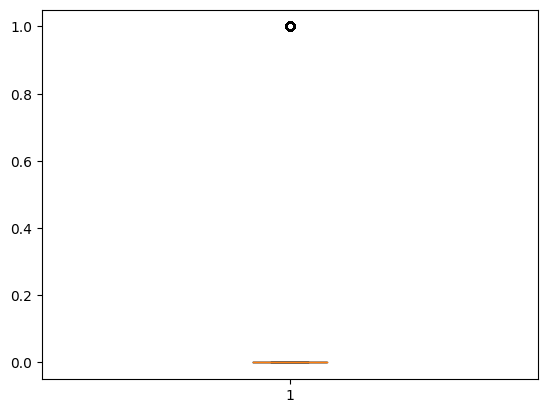

In [147]:
plt.boxplot(data['awards_won?'])
plt.show()

In [148]:
q1 = data['awards_won?'].quantile(0.25)
q2 = data['awards_won?'].quantile(0.5)
q3 = data['awards_won?'].quantile(0.75)

In [149]:
iqr = q3 -q1
up_lim = q3+(1.5*iqr)
low_lim = q1-(1.5*iqr)
print(up_lim,low_lim)

0.0 0.0


In [150]:
def limit_imputer(value):
    if value>up_lim:
        return up_lim
    if value<low_lim:
        return low_lim
    else:
        return value

In [151]:
data['awards_won?'] = data['awards_won?'].apply(limit_imputer)

In [152]:
# avg_training_score

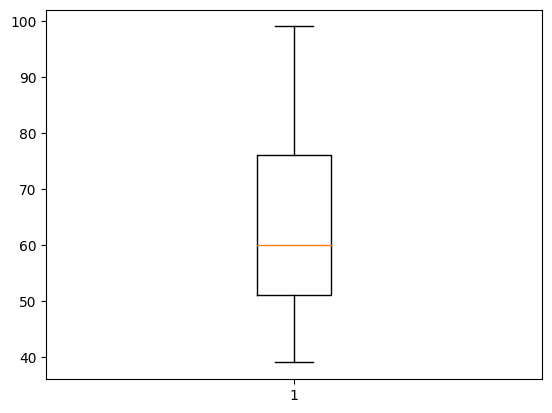

In [153]:
plt.boxplot(data['avg_training_score'])
plt.show()

In [154]:
# is_promoted

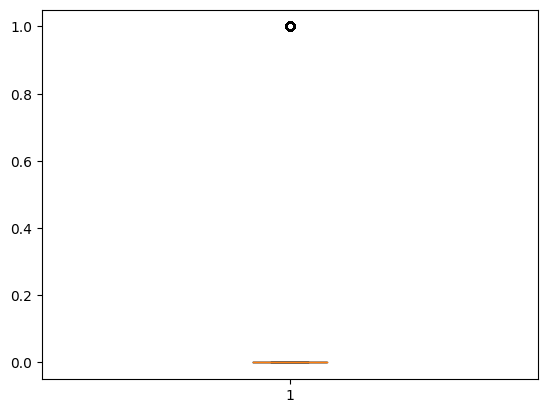

In [155]:
plt.boxplot(data['is_promoted'])
plt.show()

In [156]:
q1 = data['is_promoted'].quantile(0.25)
q2 = data['is_promoted'].quantile(0.5)
q3 = data['is_promoted'].quantile(0.75)

In [157]:
iqr = q3 -q1
up_lim = q3+(1.5*iqr)
low_lim = q1-(1.5*iqr)
print(up_lim,low_lim)

0.0 0.0


In [158]:
def limit_imputer(value):
    if value>up_lim:
        return up_lim
    if value<low_lim:
        return low_lim
    else:
        return value

In [159]:
data['is_promoted'] = data['is_promoted'].apply(limit_imputer)

In [160]:
data.shape

(54808, 14)

# **Encoding**

In [161]:
data.drop('employee_id',axis=1,inplace=True)

In [162]:
# department

In [163]:
data['department'].unique()

array(['Sales & Marketing', 'Operations', 'Technology', 'Analytics',
       'R&D', 'Procurement', 'Finance', 'HR', 'Legal'], dtype=object)

In [164]:

dict1 = {'Sales & Marketing':0,'Operations':1, 'Technology':2, 'Analytics':3,
       'R&D':4, 'Procurement':5, 'Finance':6, 'HR':7, 'Legal':8}
data['department']= data['department'].map(dict1)

In [165]:
data.drop('region',axis=1,inplace=True)

In [166]:
# education

In [167]:
data['education'].unique()

array(["Master's & above", "Bachelor's", 'Below Secondary'], dtype=object)

In [168]:
dict1 = {"Master's & above":0, "Bachelor's":1, 'Below Secondary':2}
data['education']= data['education'].map(dict1)

In [169]:
# gender

In [170]:
data['gender'].unique()

array(['f', 'm'], dtype=object)

In [171]:
dict1 = {'f':0, 'm':1}
data['gender']= data['gender'].map(dict1)

In [172]:
# recruitment_channel

In [173]:
data['recruitment_channel'].unique()

array(['sourcing', 'other', 'referred'], dtype=object)

In [174]:
dict1 = {'sourcing':0, 'other':1, 'referred':2}
data['recruitment_channel']= data['recruitment_channel'].map(dict1)

In [175]:
data.head()

,department,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,0,0,0,0,1.0,35.0,14.0,8.0,1,0.0,49,0.0
1,1,1,1,1,1.0,30.0,14.0,4.0,0,0.0,60,0.0
2,0,1,1,0,1.0,34.0,14.0,7.0,0,0.0,50,0.0
3,0,1,1,1,1.0,39.0,14.0,10.0,0,0.0,50,0.0
4,2,1,1,1,1.0,45.0,14.0,2.0,0,0.0,73,0.0


# **create the model**

In [176]:
X=data.drop('is_promoted',axis=1)
Y=data['is_promoted']

In [177]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.25,random_state =1)

In [178]:
x_train

,department,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
12578,1,1,0,0,1.0,40.0,14.0,4.0,0,0.0,61
21383,3,1,1,1,1.0,27.0,14.0,3.0,1,0.0,88
2768,3,1,1,0,1.0,25.0,14.0,3.0,1,0.0,84
2106,2,1,1,1,1.0,27.0,14.0,2.0,0,0.0,80
29462,4,1,1,1,1.0,39.0,14.0,9.0,0,0.0,86
...,...,...,...,...,...,...,...,...,...,...,...
50057,0,0,0,0,1.0,30.0,14.0,6.0,0,0.0,56
32511,1,1,1,0,1.0,26.0,14.0,4.0,0,0.0,62
5192,5,0,0,1,1.0,36.0,14.0,10.0,1,0.0,69
12172,1,0,1,1,1.0,45.0,14.0,4.0,1,0.0,62


In [179]:
y_train

12578    0.0
21383    0.0
2768     0.0
2106     0.0
29462    0.0
        ... 
50057    0.0
32511    0.0
5192     0.0
12172    0.0
33003    0.0
Name: is_promoted, Length: 41106, dtype: float64

In [180]:
x_test

,department,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
931,5,1,0,1,1.0,46.0,14.0,13.0,1,0.0,74
28310,0,1,1,1,1.0,28.0,14.0,1.0,1,0.0,47
7767,0,1,1,0,1.0,31.0,14.0,7.0,1,0.0,53
17330,0,1,1,1,1.0,25.0,14.0,3.0,0,0.0,47
15222,5,0,0,1,1.0,30.0,14.0,8.0,0,0.0,73
...,...,...,...,...,...,...,...,...,...,...,...
6252,2,0,1,1,1.0,46.0,14.0,13.0,0,0.0,77
18072,1,0,1,0,1.0,32.0,14.0,2.0,0,0.0,59
21597,0,1,1,0,1.0,35.0,14.0,8.0,0,0.0,44
46644,0,0,1,1,1.0,36.0,14.0,2.0,0,0.0,49


In [181]:
y_test

931      0.0
28310    0.0
7767     0.0
17330    0.0
15222    0.0
        ... 
6252     0.0
18072    0.0
21597    0.0
46644    0.0
42013    0.0
Name: is_promoted, Length: 13702, dtype: float64

In [182]:
from sklearn.linear_model import LinearRegression

In [183]:
lr=LinearRegression()

In [184]:
lr.fit(x_train,y_train)

LinearRegression()

In [185]:
y_pred =lr.predict(x_test)

In [186]:
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [187]:
from sklearn.metrics import mean_squared_error

In [188]:
mse = mean_squared_error(y_test,y_pred)

In [189]:
print(mse)

0.0


In [190]:
from sklearn.metrics import mean_absolute_error,r2_score

In [191]:
 mean_absolute_error(y_test,y_pred)

0.0

In [192]:
r2_score(y_test,y_pred)

1.0

# **Scaling**

In [193]:
from sklearn.preprocessing import StandardScaler

In [194]:
sc = StandardScaler()

In [195]:
X.loc[:,['department', 'education', 'gender', 'recruitment_channel',
       'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score']]=sc.fit_transform(X[['department', 'education', 'gender', 'recruitment_channel',
       'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score']])

In [196]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.25,random_state =1)

In [197]:
lr.fit(x_train,y_train)

LinearRegression()

In [198]:
y_pred1=lr.predict(x_test)

In [199]:
mse = mean_squared_error(y_test,y_pred1)

In [200]:
mse

0.0

In [201]:
data.head()

,department,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,0,0,0,0,1.0,35.0,14.0,8.0,1,0.0,49,0.0
1,1,1,1,1,1.0,30.0,14.0,4.0,0,0.0,60,0.0
2,0,1,1,0,1.0,34.0,14.0,7.0,0,0.0,50,0.0
3,0,1,1,1,1.0,39.0,14.0,10.0,0,0.0,50,0.0
4,2,1,1,1,1.0,45.0,14.0,2.0,0,0.0,73,0.0
